In [1]:
#import libraries 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
#looking at data
df = pd.read_csv("Animal Dataset.csv")
df.head(10)

,Animal,Height (cm),Weight (kg),Color,Lifespan (years),Diet,Habitat,Predators,Average Speed (km/h),Countries Found,Conservation Status,Family,Gestation Period (days),Top Speed (km/h),Social Structure,Offspring per Birth
0,Aardvark,105-130,40-65,Grey,20-30,Insectivore,"Savannas, Grasslands","Lions, Hyenas",40,Africa,Least Concern,Orycteropodidae,210-240,40,Solitary,1
1,Aardwolf,40-50,8-14,Yellow-brown,10-12,Insectivore,"Grasslands, Savannas","Lions, Leopards",24-30,Eastern and Southern Africa,Least Concern,Hyaenidae,90,40,Solitary,2-5
2,African Elephant,270-310,2700-6000,Grey,60-70,Herbivore,"Savannah, Forest","Lions, Hyenas",25,Africa,Vulnerable,Elephantidae,640-660,40,Herd-based,1
3,African Lion,80-110,120-250,Tan,10-14,Carnivore,"Grasslands, Savannas","Hyenas, Crocodiles",58,Africa,Vulnerable,Felidae,98-105,80,Group-based,2-4 (usually)
4,African Wild Dog,75-80,18-36,Multicolored,10-12,Carnivore,Savannahs,"Lions, Hyenas",56,Sub-Saharan Africa,Endangered,Canidae,70,56,Group-based,10-12
5,Alpine Ibex,67-101,19-120,Brown,15-20,Herbivore,"Mountains, Alpine","Wolves, Golden Eagles",56-64,European Alps,Least Concern,Bovidae,150,56-64,Group-based,1
6,Amazon Rainforest Frog,2-13,Up to 0.5,Various,4-17,Insectivore,Amazon Rainforest,"Birds, Snakes",0.1-1,Amazon Rainforest,Not Evaluated,Dendrobatidae,10-15,0.8,Solitary,Up to 40
7,American Bison,152-186,"318-1,000",Brown,15-20,Herbivore,"Grasslands, Plains","Wolves, Grizzly Bears",40-56,North America,Near Threatened,Bovidae,270-290,56,Group-based,1
8,Anteater,52-91,22-41,"Brown, White",15-20,Insectivore,"Grasslands, Forests","Jaguars, Pumas",24,Central and South America,Least Concern,Myrmecophagidae,190-210,24,Solitary,1
9,Arabian Horse,140-160,380-1000,Various,25-30,Herbivore,"Middle East, North Africa","Humans, Predators",65,"Middle East, North Africa",Not Applicable,Equidae,330-342,65,Herd-based,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Animal                   205 non-null    object
 1   Height (cm)              205 non-null    object
 2   Weight (kg)              205 non-null    object
 3   Color                    205 non-null    object
 4   Lifespan (years)         205 non-null    object
 5   Diet                     205 non-null    object
 6   Habitat                  205 non-null    object
 7   Predators                205 non-null    object
 8   Average Speed (km/h)     205 non-null    object
 9   Countries Found          205 non-null    object
 10  Conservation Status      205 non-null    object
 11  Family                   205 non-null    object
 12  Gestation Period (days)  205 non-null    object
 13  Top Speed (km/h)         205 non-null    object
 14  Social Structure         205 non-null    o

In [4]:
df.shape

(205, 16)

In [5]:
#count nas per col 
nas= df.isna().sum()
nas

Animal                     0
Height (cm)                0
Weight (kg)                0
Color                      0
Lifespan (years)           0
Diet                       0
Habitat                    0
Predators                  0
Average Speed (km/h)       0
Countries Found            0
Conservation Status        0
Family                     0
Gestation Period (days)    0
Top Speed (km/h)           0
Social Structure           0
Offspring per Birth        0
dtype: int64

In [7]:
#because some columns like offspring per birth 
#and gestation period have ranges I will take the higher end

In [ ]:
gsp = df["Gestation Period (days)"]
df["Gestation Period (days)"] = gsp.str.extract(r'(\d+)')

lifespan = df["Lifespan (years)"]
df["Lifespan (years)"] = lifespan.str.extract(r'(\d+)')


offspring = df["Offspring per Birth"]
df["Offspring per Birth"] = offspring.str.extract(r'(\d+)') 

df.head()


,Animal,Height (cm),Weight (kg),Color,Lifespan (years),Diet,Habitat,Predators,Average Speed (km/h),Countries Found,Conservation Status,Family,Gestation Period (days),Top Speed (km/h),Social Structure,Offspring per Birth
0,Aardvark,105-130,40-65,Grey,20,Insectivore,"Savannas, Grasslands","Lions, Hyenas",40,Africa,Least Concern,Orycteropodidae,210,40,Solitary,1
1,Aardwolf,40-50,8-14,Yellow-brown,10,Insectivore,"Grasslands, Savannas","Lions, Leopards",24-30,Eastern and Southern Africa,Least Concern,Hyaenidae,90,40,Solitary,2
2,African Elephant,270-310,2700-6000,Grey,60,Herbivore,"Savannah, Forest","Lions, Hyenas",25,Africa,Vulnerable,Elephantidae,640,40,Herd-based,1
3,African Lion,80-110,120-250,Tan,10,Carnivore,"Grasslands, Savannas","Hyenas, Crocodiles",58,Africa,Vulnerable,Felidae,98,80,Group-based,2
4,African Wild Dog,75-80,18-36,Multicolored,10,Carnivore,Savannahs,"Lions, Hyenas",56,Sub-Saharan Africa,Endangered,Canidae,70,56,Group-based,10


In [9]:
df = df.dropna(subset=["Gestation Period (days)", "Offspring per Birth", "Lifespan (years)"])


In [10]:
df["Gestation Period (days)"] = df["Gestation Period (days)"].astype(int)
df["Offspring per Birth"] = df["Offspring per Birth"].astype(int)
df["Lifespan (years)"] = df["Lifespan (years)"].astype(int)

In [ ]:
#see summary stats
summary = df.groupby("Conservation Status").agg(Count=("Animal", "count"),avg_gestation=("Gestation Period (days)", "mean"),
avg_offspring=("Offspring per Birth", "mean"),avg_lifespan=("Lifespan (years)", "mean")).reset_index()
summary[["avg_gestation", "avg_offspring", "avg_lifespan"]] = summary[["avg_gestation", "avg_offspring", "avg_lifespan"]].round(1)

print(summary)

     Conservation Status  Count  avg_gestation  avg_offspring  avg_lifespan
0  Critically Endangered     18          195.8            7.6          26.2
1         Data Deficient      1           50.0          200.0           3.0
2             Endangered     31          173.2            2.9          23.5
3                Extinct      1          121.0            1.0           4.0
4          Least Concern     64          107.0           10.5          13.7
5        Near Threatened     15           84.4           30.8          14.9
6         Not Applicable      6          105.8            3.5          12.5
7          Not Evaluated      7           19.7           68.1           7.6
8             Vulnerable     33          128.8            3.5          30.0


In [33]:
critically_endangered = df[df["Conservation Status"] == "Critically Endangered"]
critically_endangered = critically_endangered[critically_endangered["Animal"] != "Sumatran Rhinoceros"]
critically_endangered

,Animal,Height (cm),Weight (kg),Color,Lifespan (years),Diet,Habitat,Predators,Average Speed (km/h),Countries Found,Conservation Status,Family,Gestation Period (days),Top Speed (km/h),Social Structure,Offspring per Birth
17,Axolotl,Up to 30,Up to 300,Various,10,Carnivore,"Lakes, Canals","Fish, Birds",0.8,Mexico,Critically Endangered,Ambystomatidae,14,0.2-0.3,Solitary,100
27,Black Rhinoceros,132-180,"800-1,400","Gray, Black",35,Herbivore,"Grasslands, Forests","Lions, Hyenas",56,Eastern and Southern Africa,Critically Endangered,Rhinocerotidae,450,56,Solitary,1
36,Bornean Orangutan,96-150,30-82,Reddish-brown,35,Omnivore,Rainforests,"Tigers, Humans",40-64,Borneo,Critically Endangered,Hominidae,230,40-64,Solitary,1
72,Gharial,Up to 600,Up to 1500,Brownish-gray,40,Carnivore,"Rivers, Lakes","Crocodiles, Tigers",32,Indian subcontinent,Critically Endangered,Gavialidae,94,32,Solitary,20
96,Indri,Up to 70,Up to 6,"Black, White",15,Herbivore,Rainforests,"Fossa, Birds of Prey",24-27,Madagascar,Critically Endangered,Indridae,120,24-27,Solitary,1
99,Kakapo,Up to 60,Up to 4,Green,60,Herbivore,"Forests, Islands","Rats, Cats",2.5,New Zealand,Critically Endangered,Strigopidae,21,2.4,Solitary,1
107,Lemur,30-65,0.6-4.5,Varies,15,Herbivore,Forests,Fossa,29,Madagascar,Critically Endangered,Lemuridae,120,29,Group-based,1
126,Orangutan,Up to 160,30-82,Reddish-brown,30,Omnivore,Rainforests,"Tigers, Humans",6-12,"Indonesia, Malaysia",Critically Endangered,Hominidae,230,40,Solitary,1
127,Pangolin,30-100,2-40,"Brown, Yellowish",10,Insectivore,"Grasslands, Forests","Lions, Tigers",32,"Asia, Africa",Critically Endangered,Manidae,240,32,Solitary,1
145,Saola,Up to 90,Up to 100,"Brown, White",21,Herbivore,Forests,"Tigers, Leopards",26,"Vietnam, Laos",Critically Endangered,Bovidae,240,26,Solitary,1


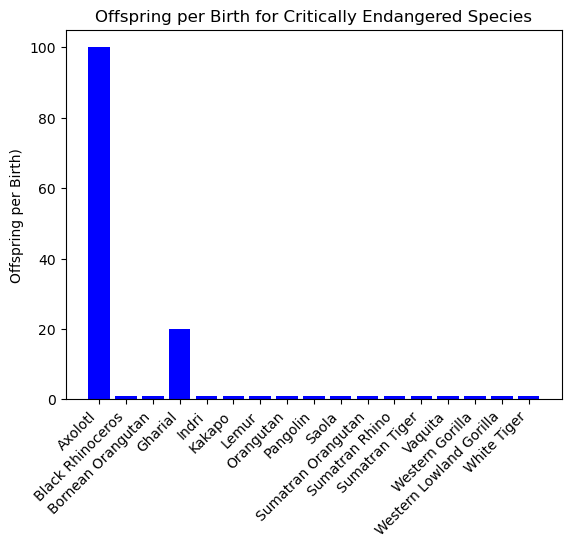

In [39]:
#offspring per brith
plt.bar(critically_endangered["Animal"], critically_endangered["Offspring per Birth"], color="blue")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Offspring per Birth)")
plt.title("Offspring per Birth for Critically Endangered Species")
plt.show()

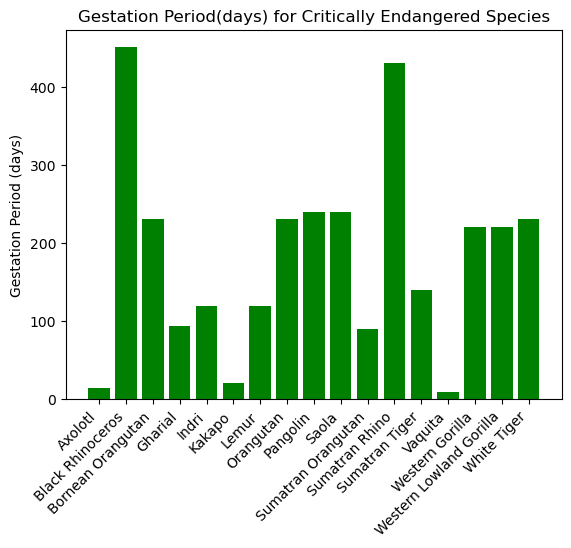

In [ ]:
#gest 
plt.bar(critically_endangered["Animal"], critically_endangered["Gestation Period (days)"], color="green")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Gestation Period (days)")
plt.title("Gestation Period(days) for Critically Endangered Species")
plt.show()

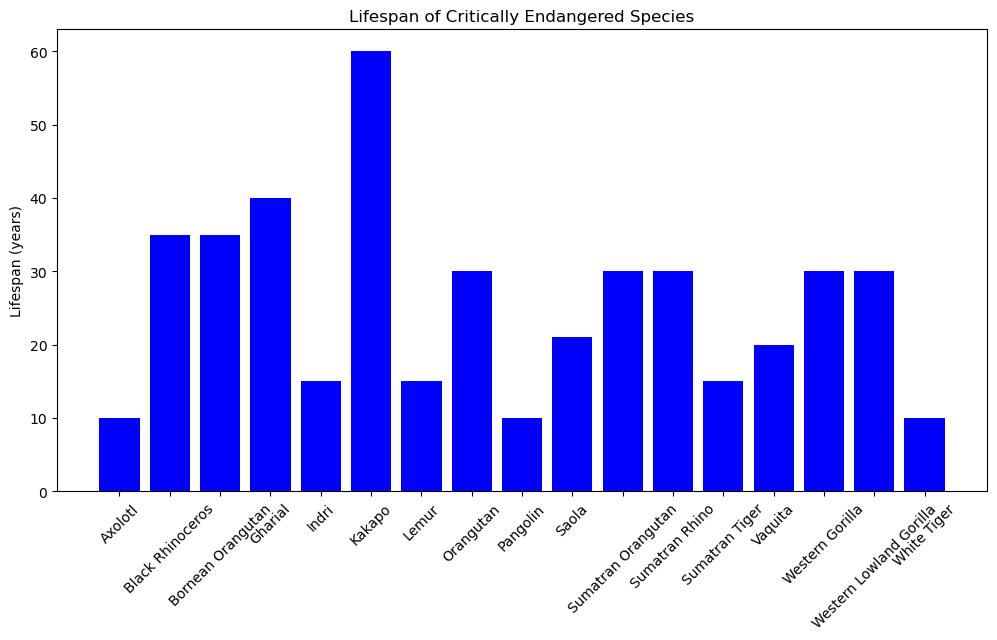

In [41]:
#lifespan
plt.figure(figsize=(12,6))
plt.bar(critically_endangered["Animal"], critically_endangered["Lifespan (years)"], color="blue")
plt.xticks(rotation=45)
plt.ylabel("Lifespan (years)")
plt.title("Lifespan of Critically Endangered Species")
plt.show()
